In [1]:
import JupyROOT
JupyROOT.helpers.utils._jsROOTSourceDir = 'https://root.cern.ch/js/notebook/'
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import os
import time
import math
# ROOT.enableJSVis()
c1 = ROOT.TCanvas()
ROOT.gSystem.Load("/home/vasu/quadis/build/lib/libquadis.so")
import pandas as pd

Welcome to JupyROOT 6.22/02


In [2]:
bigdata = pd.DataFrame()
folder = "/home/vasu/PPC/PPC_SigGen/arrays/zscan_ra"
for file in os.listdir(folder):
    filepath = os.path.join(folder,file)
    df = pd.read_csv(filepath,header=None,sep='\t')
    bigdata = bigdata.append(df,ignore_index=True)

In [3]:
bigdata60 = pd.DataFrame()
folder = "/home/vasu/PPC/PPC_SigGen/arrays/zscan_libmodel"
for file in os.listdir(folder):
    filepath = os.path.join(folder,file)
    df = pd.read_csv(filepath,header=None,sep='\t')
    bigdata60 = bigdata60.append(df,ignore_index=True)

In [4]:
bigdata1 = pd.DataFrame()
folder = "/home/vasu/PPC/PPC_SigGen/arrays/zscan_new"
for file in os.listdir(folder):
    filepath = os.path.join(folder,file)
    df = pd.read_csv(filepath,header=None,sep='\t')
    bigdata1 = bigdata1.append(df,ignore_index=True)

In [5]:
index_names = bigdata[(bigdata[1] == -1)].index #drop with Ztrue = -1
bigdata = bigdata.drop(index_names)
bigdata = bigdata.reset_index(drop=True)
num = bigdata.shape[0]

In [6]:
num60 = bigdata60.shape[0]

In [7]:
index_names1 = bigdata1[(bigdata1[1] == -1)].index #drop with Ztrue = -1
bigdata1 = bigdata1.drop(index_names1)
bigdata1 = bigdata1.reset_index(drop=True)
num1 = bigdata1.shape[0]

In [8]:
trueZ = np.zeros(num)
valZ = np.zeros(num)
for i in range (num):
    trueZ[i] = bigdata[1][i]
    valZ[i] = bigdata[1][i] - bigdata[0][i]

In [9]:
trueZ60 = np.zeros(num60)
fitZ60 = np.zeros(num60)
for i in range (num60):
    trueZ60[i] = bigdata60[1][i]
    fitZ60[i] = bigdata60[1][i] - bigdata60[0][i]

In [10]:
trueZ1 = np.zeros(num)
valZ1 = np.zeros(num)
for i in range (num):
    trueZ1[i] = bigdata1[1][i]
    valZ1[i] = bigdata1[1][i] - bigdata1[0][i]

In [11]:
stdZ = []
meanZ = []
Z0 = []
for i in range (num):
    if ((i%1000)==0):
        Z0.append(trueZ[i])
        hz = ROOT.TH1F("hz","hz",300,-60,60)
        for j in range (1000):
            hz.Fill(valZ[i+j])        
        stdZ.append(hz.GetStdDev())
        meanZ.append(hz.GetMean())
        hz.Reset()

Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing ex

In [12]:
stdZ60 = []
meanZ60 = []
Z060 = []
for i in range (num60):
    if ((i%1000)==0):
        Z060.append(trueZ60[i])
        hz = ROOT.TH1F("hz","hz",300,-60,60)
        for j in range (1000):
            hz.Fill(fitZ60[i+j])        
        stdZ60.append(hz.GetStdDev())
        meanZ60.append(hz.GetMean())
        hz.Reset()

Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing ex

In [13]:
stdZ1 = []
meanZ1 = []
Z01 = []
for i in range (num):
    if ((i%1000)==0):
        Z01.append(trueZ1[i])
        hz = ROOT.TH1F("hz","hz",300,-60,60)
        for j in range (1000):
            hz.Fill(valZ1[i+j])        
        stdZ1.append(hz.GetStdDev())
        meanZ1.append(hz.GetMean())
        hz.Reset()

Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).
Warning in <TROOT::Append>: Replacing ex

In [14]:
Z = np.array(Z0)
std = np.array(np.true_divide(stdZ,math.sqrt(1000)))
mean = np.array(meanZ)
errorsX = np.zeros(len(stdZ),dtype='float')

In [15]:
std60 = np.array(stdZ60)
mean60 = np.array(meanZ60)
Z60 = np.array(Z060)
errorsX60 = np.zeros(int(num60/1000),dtype='float')
errorsY60 = np.array(np.true_divide(std60,math.sqrt(1000)))

In [16]:
Z1 = np.array(Z01)
std1 = np.array(np.true_divide(stdZ1,math.sqrt(1000)))
mean1 = np.array(meanZ1)
errorsX1 = np.zeros(len(stdZ1),dtype='float')

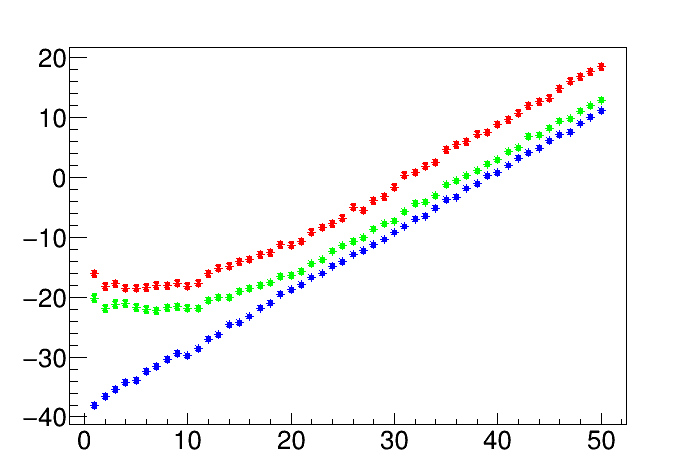

In [17]:
gr = ROOT.TMultiGraph()
g60 = ROOT.TGraphErrors(int(num60/1000),Z60,mean60,errorsX60,errorsY60)
gz = ROOT.TGraphErrors(len(stdZ),Z,mean,errorsX,std)
gz1 = ROOT.TGraphErrors(len(stdZ1),Z1,mean1,errorsX1,std1)
g60.SetMarkerColor(2) #red
gz.SetMarkerColor(3) #green
gz1.SetMarkerColor(4)
g60.SetLineColor(2) #red
gz.SetLineColor(3) #green
gz1.SetLineColor(4)
g60.SetLineWidth(3)
gz.SetLineWidth(3)
gz1.SetLineWidth(3)
gr.Add(g60)
gr.Add(gz)
gr.Add(gz1)
gr.Draw("A*")

# legend.SetHeader("Legend","C")
# legend.AddEntry(g1,"1MeV","l")
# legend.AddEntry(g150,"300keV","l")
# legend.AddEntry(g60,"60keV","l")
# legend.Draw()

gr.GetXaxis().SetLabelSize(0.06)
gr.GetYaxis().SetLabelSize(0.06)
gr.GetXaxis().SetTitleSize(444)
gr.GetYaxis().SetTitleSize(444)
c1.Draw()